# Demo: Overfitting, Weight-Regularization

In [57]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

$w_\mathrm{new} = w - \alpha\nabla J(w)$

### Plot polynomial

Here we plot the polynomial curve $f(x) = 5x^3 + 4x^2 - 2x - 0.5$.

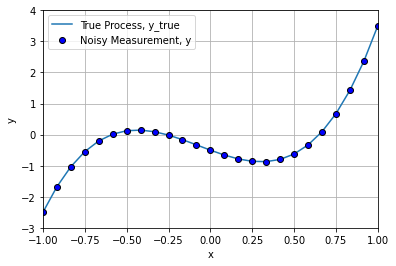

In [59]:
nsamp = 25 # number of samples taken
p = np.array([5,1,-2,-.5]) # true coefficients
var = 0.1 # noise variance

# we'll take a set of measurements uniformly
x = np.linspace(-1,1,nsamp)
y_true = np.polyval(p,x)

plt.plot(x,y_true)
# we can force a scatter plot in plt.plot by making the third argument 'o'
plt.plot(x,y_true,'ob',markeredgecolor='black');
plt.grid();
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1,1])
plt.ylim([-3,4])
plt.legend(['True Process, y_true','Noisy Measurement, y']);

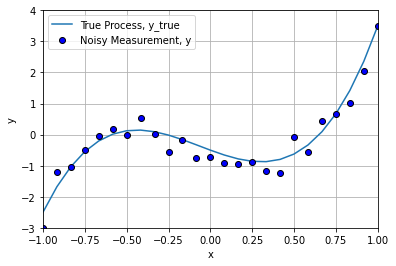

In [63]:
nsamp = 25 # number of samples taken
p = np.array([5,1,-2,-.5]) # true coefficients
var = 0.1 # noise variance

# we'll take a set of measurements uniformly
x = np.linspace(-1,1,nsamp)
y_true = np.polyval(p,x)
# noisy measurement, ym. use sqrt(var) as numpy normal standard deviation
y = y_true + np.random.normal(0, np.sqrt(var), nsamp)

plt.plot(x,y_true)
# we can force a scatter plot in plt.plot by making the third argument 'o'
plt.plot(x,y,'ob',markeredgecolor='black');
plt.grid();
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1,1])
plt.ylim([-3,4])
plt.legend(['True Process, y_true','Noisy Measurement, y']);

In [68]:
# x.shape, y.shape, nsamp
# np.random.permutation(nsamp),
inds, inds[:ntrain], inds[ntrain:ntrain+nval], inds[ntrain+nval:]

# inds
x, xtrain

(array([-1.        , -0.91666667, -0.83333333, -0.75      , -0.66666667,
        -0.58333333, -0.5       , -0.41666667, -0.33333333, -0.25      ,
        -0.16666667, -0.08333333,  0.        ,  0.08333333,  0.16666667,
         0.25      ,  0.33333333,  0.41666667,  0.5       ,  0.58333333,
         0.66666667,  0.75      ,  0.83333333,  0.91666667,  1.        ]),
 array([-0.41666667,  0.75      , -0.08333333, -0.16666667,  0.33333333,
        -0.66666667,  0.58333333,  0.91666667, -0.5       ,  0.66666667,
        -0.83333333, -1.        ,  0.25      , -0.25      ,  0.83333333]))

In [64]:
# train test validation split
ntrain = 15
nval = 5
ntest = 5

inds = np.random.permutation(nsamp)

train_choices = inds[:ntrain]
val_choices = inds[ntrain:ntrain+nval]
test_choices = inds[ntrain+nval:]

xtrain, ytrain = x[train_choices], y[train_choices]
xval, yval     = x[val_choices], y[val_choices]
xtest, ytest   = x[test_choices], y[test_choices]

### Design Matrix

We have the design matrix as $D = \begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 & \cdots & x_1^{M}\\
1 & x_2 & x_2^2 & x_2^3 & \cdots & x_2^{M}\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots\\ 
1 & x_n & x_n^2 & x_n^3 & \cdots & x_n^{M}
\end{bmatrix}$

- Complete the design matrix and set M = 25, the shape of the design matrix should be (15, 26)

In [44]:
ones = np.ones((15, 1))
xtrain_reshaped = xtrain.reshape((-1, 1))
X = np.hstack((ones, xtrain_reshaped))
x_train_reshaped_squared = xtrain_reshaped**

np.hstack((X, x_train_reshaped_squared))

array([[ 1.        ,  0.83333333,  0.69444444],
       [ 1.        ,  0.58333333,  0.34027778],
       [ 1.        ,  0.25      ,  0.0625    ],
       [ 1.        ,  0.08333333,  0.00694444],
       [ 1.        ,  0.91666667,  0.84027778],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.16666667,  0.02777778],
       [ 1.        , -0.16666667,  0.02777778],
       [ 1.        , -0.33333333,  0.11111111],
       [ 1.        ,  0.75      ,  0.5625    ],
       [ 1.        , -0.5       ,  0.25      ],
       [ 1.        , -0.58333333,  0.34027778],
       [ 1.        , -0.75      ,  0.5625    ],
       [ 1.        , -0.83333333,  0.69444444],
       [ 1.        ,  0.33333333,  0.11111111]])

In [54]:
# forming the design matrix
# features x, model order M

def design_matrix(x, M):
    # TODO
    # To-do
    
    # 1. create the empty array of ones
    Design_Matrix = np.ones((x.shape[0],M+1)) # use the np.ones function
    
    # 2. use a for loop to populate the Design_Matrix columnwise
    for j in range(M):
        Design_Matrix[:,j+1] = x**(j+1)#provide an expression for each column of Design_Matrix
    
    
    return Design_Matrix


M = 10
Xtrain = design_matrix(xtrain, M)
Xval = design_matrix(xval,M)
Xtest = design_matrix(xtest,M)
print(Xtrain.shape, )

(15, 11)


Train RMSE = 1.4694
Test RMSE = 1.9792


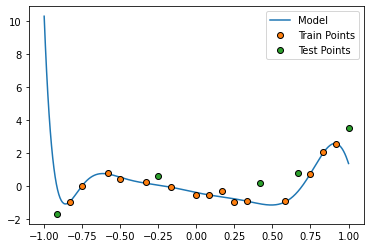

w = 
[[  -0.4 ]
 [  -1.91]
 [   1.66]
 [   6.55]
 [ -23.63]
 [ -50.49]
 [ 113.12]
 [ 135.51]
 [-183.08]
 [ -94.12]
 [  98.16]]


In [55]:
from sklearn import linear_model

# TODO
# fit the polynomial model using linear regression 
# 1. Use 'reg' as name for your regressor and set fit_intercept = False
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(Xtrain, ytrain.reshape((-1, 1)))
w = reg.coef_


# print the training error RMSE
# 1. generate the predictions y_train_pred
# 2. use the skearn metric MSE to calculate RMSE (note: pass squared=False)
yhat = reg.predict(Xtrain)
RMSE = np.sqrt(np.mean((ytrain-yhat)**2) )
print("Train RMSE = %.4f" % RMSE)


# print the test error RMS
# 1. generate the predictions y_test_pred
# 2. use the skearn metric MSE to calculate RMSE (note: pass squared=False)
Xtest = design_matrix(xtest, M)
yhat = reg.predict(Xtest)
RMSE = np.sqrt( np.mean((ytest-yhat)**2) )
print("Test RMSE = %.4f" % RMSE)

# see what happens to the error values above as M is set to a high number

# plotting
x_line = np.linspace(-1,1,500)
X_line = design_matrix(x_line, M)
y_line = reg.predict(X_line)

plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain,ytrain,'o',markeredgecolor='black')
plt.plot(xtest,ytest,'o',markeredgecolor='black')
# plt.xlim([-1,1])
# plt.ylim([-3,4])
plt.legend(['Model','Train Points', 'Test Points'])
plt.show()

w = reg.coef_
print("w = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))

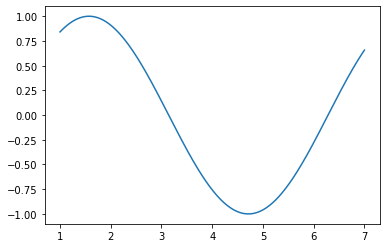

In [70]:
# x = np.array([1, 2, 3, 4, 5, 6, 7])
x = np.linspace(1, 7, 500)
y = np.sin(x)
plt.plot(x, y)

### weight based regularization

- Lasso: L1 norm regularizer $\displaystyle\frac{1}{2n_\mathrm{samples}}\|y - Xw\|^2_2 + \alpha\|w\|_1$


- Ridge: L2 norm regularizer $\displaystyle\|y - Xw\|^2_2 + \alpha\|w\|^2_2$

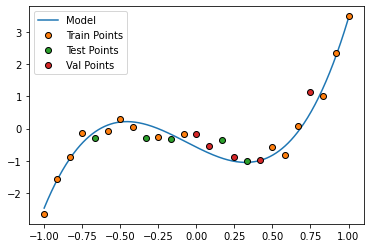

In [29]:
# TODO

# Using the following models to fit the data
# reg = linear_model.Lasso(alpha=.02, fit_intercept=False)
# reg = linear_model.Ridge(alpha=.05, fit_intercept=False)

#***********************************************************************************#

# print the training error RMSE
# 1. generate the predictions y_train_pred
# 2. use the skearn metric MSE to calculate RMSE (note: pass squared=False)

#***********************************************************************************#

# print the validation error RMSE
# 1. generate the predictions y_val_pred
# 2. use the skearn metric MSE to calculate RMSE (note: pass squared=False)

#***********************************************************************************#

# print the test error RMSE
# 1. generate the predictions y_test_pred
# 2. use the skearn metric MSE to calculate RMSE (note: pass squared=False)

#***********************************************************************************#


# see what happens to the error values above as M is set to a high number
# print(f"The train error is, {mse_train:.3f}")
# print(f"The validation error is, {mse_val:.3f}")
# print(f"The test error is, {mse_test:.3f}")


# plotting

x_line = np.linspace(-1,1,500)
X_line = design_matrix(x_line, M)
y_line = reg.predict(X_line)


plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain,ytrain,'o',markeredgecolor='black')
plt.plot(xtest,ytest,'o',markeredgecolor='black')
plt.plot(xval,yval,'o',markeredgecolor='black')
# plt.xlim([-1,1])
# plt.ylim([-3,3])
plt.legend(['Model','Train Points', 'Test Points', 'Val Points'])
plt.show()

w = reg.coef_
print("w = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))